[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 1366, number of used features: 17
[LightGBM] [Info] Start training from score -1.993895
[LightGBM] [Info] Start training from score -2.010156
[LightGBM] [Info] Start training from score -1.785920
[LightGBM] [Info] Start training from score -1.977895
[LightGBM] [Info] Start training from score -1.826014
[LightGBM] [Info] Start training from score -2.004706
[LightGBM] [Info] Start training from score -2.054856
[LightGBM] [Warning] No fu

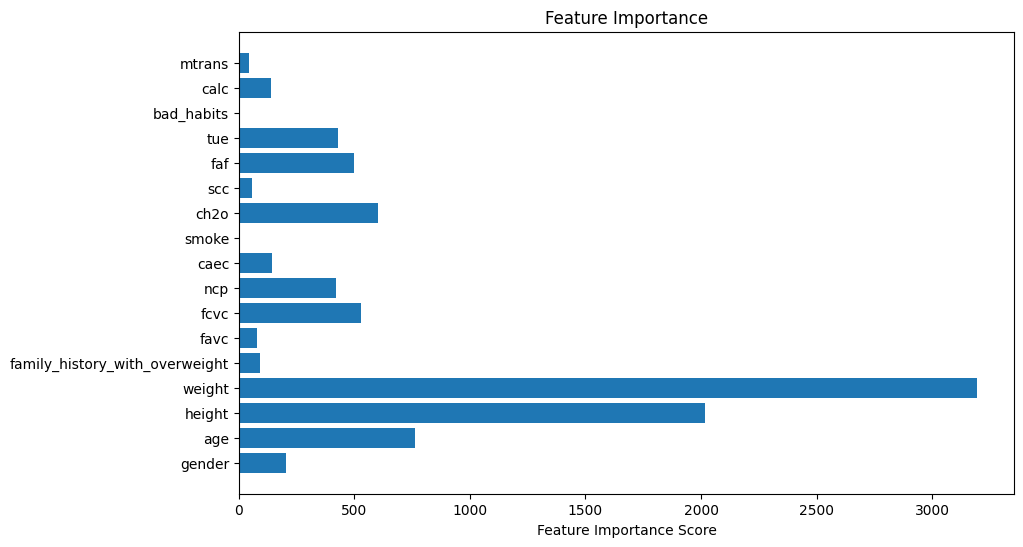

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 1366, number of used features: 17
[LightGBM] [Info] Start training from score -1.999286
[LightGBM] [Info] Start training from score -2.026685
[LightGBM] [Info] Start training from score -1.816965
[LightGBM] [Info] Start training from score -1.983200
[LightGBM] [Info] Start training from score -1.844364
[LightGBM] [Info] Start training from score -1.967369
[LightGBM] [Info] Start training from score -2.004706
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/Users/federicovargas/Documents/Maestría Big Data Science/Gestion de Proyectos/Proyecto Fin de Grupo PFG/Obesity/notebooks/3-Models/train.csv')


# Define independent and dependent variables
X = data.drop('nobeyesdad', axis=1)
y = data['nobeyesdad']

# Encode categorical variables and standardize numerical features
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

# Create transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = LGBMClassifier(n_estimators=100, learning_rate=0.05, max_depth=10, num_leaves=30,
                       min_data_in_leaf=20, reg_alpha=0.1, reg_lambda=0.1)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict probabilities for each class
y_probs = pipeline.predict_proba(X_test)  # This will give you probabilities for each class

# You should pass all class probabilities to roc_auc_score if it's multi-class
auc_roc = roc_auc_score(y_test, y_probs, multi_class='ovr')

print(f'Accuracy: {accuracy:.2f}')
print(f'AUC ROC: {auc_roc:.2f}')


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# Feature Importance
feature_imp = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_imp)), feature_imp)
plt.yticks(np.arange(len(X.columns)), X.columns)
plt.xlabel('Feature Importance Score')
plt.title('Feature Importance')
plt.show()

# Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
print('CV Mean Accuracy: %0.2f' % cv_scores.mean())
